# Project 1

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply **all** the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear), Decison Tree Regressor. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy beside accuracy and justify your choice.
- Apply **all** the classification models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results.
- Your submission should have at least the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree Classifier. 
- Finally, find the best model for the classification dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Deliverables:
- Use markdown to provide inline comments for this project. 
- Use markdown to create a report for this project. 
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs. 
- Visualization highly encouraged. 
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convention:
    - ``Project1_Regression_GroupXX_Lastname1_Lastname2.ipynb``
    - ``Project1_Classification_GroupXX_Lastname1_Lastname2.ipynb``
  
  then zip these two files and the csv files of the two datasets into one file and submit. 
- If you are submitting a single file, then please follow below naming convention:
    - ``Project1_Both_GroupXX_Lastname1_Lastname2.ipynb
    then zip these this file and the csv files of the two datasets into one file and submit. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. 

# Data Source

https://www.kaggle.com/arashnic/marketing-seris-customer-lifetime-value?select=squark_automotive_CLV_production_data.csv

Since this data had no null values, I decided to randomly implement null values in the data set

# Importing Packages and calling in the Dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance null.csv')

# Data Exploration and Cleaning

In [3]:
list(df)

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'Gender',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'EmploymentStatus',
 'Income']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       1032 non-null   object 
 1   State                          1030 non-null   object 
 2   Response                       1033 non-null   object 
 3   Coverage                       1028 non-null   object 
 4   Education                      1028 non-null   object 
 5   Effective To Date              1031 non-null   object 
 6   Gender                         1031 non-null   object 
 7   Location Code                  1028 non-null   object 
 8   Marital Status                 1035 non-null   object 
 9   Monthly Premium Auto           1031 non-null   float64
 10  Months Since Last Claim        1030 non-null   float64
 11  Months Since Policy Inception  1033 non-null   float64
 12  Number of Open Complaints      1032 non-null   f

In [5]:
df.shape

(1035, 23)

Our dataset has 1035 rows and 23 columns preprocessing

In [6]:
print(f'We have a {(df.isnull().sum().sum() * 100 / len(df)):.2f}% of missing values in our dataset') 

We have a 8.31% of missing values in our dataset


As we can see that we have some missing values in our data set that we will need to clean before we start our modeling

In [7]:
df.head()

,Customer,State,Response,Coverage,Education,Effective To Date,Gender,Location Code,Marital Status,Monthly Premium Auto,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,EmploymentStatus,Income
0,FH77504,California,Yes,Premium,Bachelor,1/24/2011,F,Suburban,Single,283.0,...,1.0,Personal Auto,Personal L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,Employed,51643
1,XK87182,Oregon,No,Premium,College,1/25/2011,F,Urban,Married,113.0,...,1.0,Personal Auto,Personal L3,Offer1,Agent,476.385575,Four-Door Car,Medsize,Employed,46402
2,HB17438,Washington,No,Extended,Bachelor,2/21/2011,M,Urban,Married,132.0,...,3.0,Personal Auto,Personal L1,Offer4,Web,617.288574,SUV,Medsize,Employed,92044
3,DH18269,Arizona,No,Extended,College,1/13/2011,M,Suburban,Divorced,96.0,...,2.0,Personal Auto,Personal L3,Offer1,Branch,611.476898,Two-Door Car,Medsize,Medical Leave,16040
4,DP19820,Oregon,No,Extended,College,1/15/2011,M,Suburban,Single,135.0,...,2.0,Personal Auto,Personal L2,Offer2,Branch,980.528170,SUV,Small,Unemployed,0


In [8]:
df.drop(['Customer', 'State', 'Effective To Date', 'Income', 'Renew Offer Type', 'Policy' , 'Sales Channel'
        ], axis = 1, inplace = True)

I dropped the following columns listed above. I decided to drop Customer since it was an identification and will not be needed when running our models. Effective to Date was dropped since it was a date. Income and State seemed redundent when predicting total claim amount. Employment status also indicates us salary. Policy Type has a subset that is much more descriptive and provides more insight so we can keep that instead of Policy Type. Sales channel is the way the policy was bought, not important for our task

In [9]:
df.isnull().sum()

Response                         2
Coverage                         7
Education                        7
Gender                           4
Location Code                    7
Marital Status                   0
Monthly Premium Auto             4
Months Since Last Claim          5
Months Since Policy Inception    2
Number of Open Complaints        3
Number of Policies               2
Policy Type                      4
Total Claim Amount               2
Vehicle Class                    6
Vehicle Size                     4
EmploymentStatus                 0
dtype: int64

In [10]:
df['Response'].fillna(df['Response'].mode()[0], inplace = True)
df['Response'].value_counts()

No     900
Yes    135
Name: Response, dtype: int64

In [11]:
df['Coverage'].fillna(df['Coverage'].mode()[0], inplace = True)
df['Coverage'].value_counts()

Basic       639
Extended    300
Premium      96
Name: Coverage, dtype: int64

In [12]:
df['Education'].fillna(df['Education'].mode()[0], inplace = True)
df['Education'].value_counts()

Bachelor                323
College                 311
High School or Below    280
Master                   92
Doctor                   29
Name: Education, dtype: int64

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Gender'].value_counts()

M    544
F    491
Name: Gender, dtype: int64

In [14]:
df['Location Code'].fillna(df['Location Code'].mode()[0], inplace = True)
df['Location Code'].value_counts()

Suburban    681
Urban       179
Rural       175
Name: Location Code, dtype: int64

In [15]:
df['Monthly Premium Auto'].fillna(df['Monthly Premium Auto'].mean(), inplace = True)

In [16]:
df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].mean(), inplace = True)

In [17]:
df['Months Since Policy Inception'].fillna(df['Months Since Policy Inception'].mean(), inplace = True)

In [18]:
df['Number of Open Complaints'].fillna(df['Number of Open Complaints'].mean(), inplace = True)

In [19]:
df['Number of Policies'].fillna(df['Number of Policies'].mean(), inplace = True)

In [20]:
df['Policy Type'].fillna(df['Policy Type'].mode()[0], inplace = True)
df['Policy Type'].value_counts()

Personal Auto     738
Corporate Auto    283
Special Auto       14
Name: Policy Type, dtype: int64

In [21]:
df['Total Claim Amount'].fillna(df['Total Claim Amount'].mean(), inplace = True)

In [22]:
df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0], inplace = True)
df['Vehicle Class'].value_counts()

Four-Door Car    513
SUV              230
Two-Door Car     209
Sports Car        48
Luxury Car        18
Luxury SUV        17
Name: Vehicle Class, dtype: int64

In [23]:
df['Vehicle Size'].fillna(df['Vehicle Size'].mode()[0], inplace = True)
df['Vehicle Size'].value_counts()

Medsize    755
Small      178
Large      102
Name: Vehicle Size, dtype: int64

In [24]:
df.isnull().sum()

Response                         0
Coverage                         0
Education                        0
Gender                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
EmploymentStatus                 0
dtype: int64

Time to mask our variables or create dummy variables from our data set

In [25]:
df['Response'] = df['Response'].map({'No':1, 'Yes': 0}).astype(int)

In [26]:
df['Coverage'] = df['Coverage'].map({'Basic':0, 'Extended': 1, 'Premium':2}).astype(int)

In [27]:
df['Education'] = df['Education'].map({'Doctor':4, 'Master':3, 'Bachelor':2, 'College':1, 'High School or Below':0}).astype(int)

In [28]:
df['Gender'] = df['Gender'].map({'M':1, 'F': 0}).astype(int)

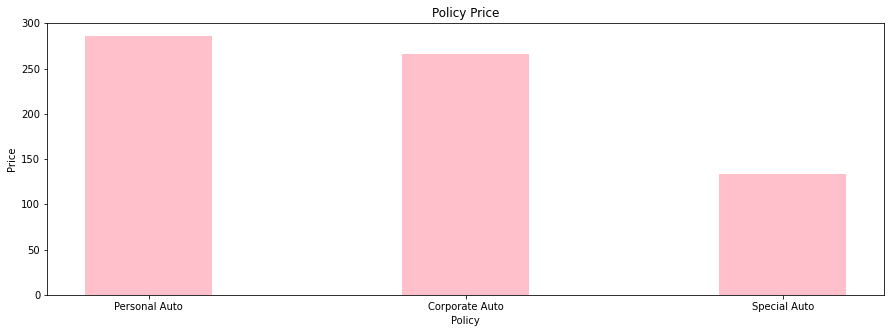

In [29]:
fig = plt.figure(figsize = (15, 5))
plt.bar(df['Policy Type'], df['Monthly Premium Auto'], color ='pink',
        width = 0.4)
plt.xlabel("Policy")
plt.ylabel("Price")
plt.title("Policy Price")
plt.show()

Since we have a clear ranking system with our policy types, we can map it such as

In [30]:
df['Policy Type'] = df['Policy Type'].map({'Personal Auto':2, 'Corporate Auto':1, 'Special Auto':0}).astype(int)

There is a clear ranking system with our vehicle class when looking at the monthly price so we should map these values

In [31]:
df2 = df.groupby('Vehicle Class').agg({'Monthly Premium Auto':['mean']})

<Figure size 1080x360 with 0 Axes>

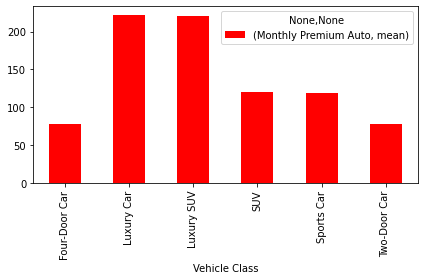

In [32]:
fig = plt.figure(figsize = (15, 5))
df2.plot(kind='bar', color = 'r')
plt.tight_layout()
plt.show()
plt.clf()
plt.close()

In [33]:
df['Vehicle Class'] = df['Vehicle Class'].map({'Luxury Car':5, 'Luxury SUV': 4, 'SUV':3, 'Sports Car':2, 'Two-Door Car':1, 'Four-Door Car':0}).astype(int)

In [34]:
df.groupby('EmploymentStatus').agg({'Monthly Premium Auto':['mean']})

,Monthly Premium Auto
,mean
EmploymentStatus,
Disabled,96.375000
Employed,92.674737
Medical Leave,87.535714
Retired,89.444444
Unemployed,98.148551


Nothing really here to tell us a trend if employment status has a ranking system, we should dummy variable these

In [35]:
cols = pd.get_dummies(df['EmploymentStatus'], prefix= 'EmploymentStatus')
df[cols.columns] = cols
df.drop('EmploymentStatus', axis = 1, inplace = True)

In [36]:
cols = pd.get_dummies(df['Location Code'], prefix= 'Location Code')
df[cols.columns] = cols
df.drop('Location Code', axis = 1, inplace = True)

In [37]:
cols = pd.get_dummies(df['Vehicle Size'], prefix= 'Vehicle Size')
df[cols.columns] = cols
df.drop('Vehicle Size', axis = 1, inplace = True)

In [38]:
cols = pd.get_dummies(df['Marital Status'], prefix= 'Marital Status')
df[cols.columns] = cols
df.drop('Marital Status', axis = 1, inplace = True)

In [39]:
df

,Response,Coverage,Education,Gender,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,...,EmploymentStatus_Unemployed,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2,2,0,283.0,16.0,43.0,0.000000,1.0,2,...,0,0,1,0,0,1,0,0,0,1
1,1,2,1,0,113.0,7.0,2.0,0.000000,1.0,2,...,0,0,0,1,0,1,0,0,1,0
2,1,1,2,1,132.0,7.0,77.0,0.000000,3.0,2,...,0,0,0,1,0,1,0,0,1,0
3,1,1,1,1,96.0,29.0,93.0,0.000000,2.0,2,...,0,0,1,0,0,1,0,1,0,0
4,1,1,1,1,135.0,12.0,84.0,0.343992,2.0,2,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1,0,2,1,73.0,18.0,89.0,0.000000,2.0,2,...,0,0,0,1,0,1,0,0,1,0
1031,0,1,1,0,79.0,14.0,28.0,0.000000,1.0,1,...,0,0,1,0,0,1,0,1,0,0
1032,1,1,2,1,85.0,9.0,37.0,3.000000,2.0,1,...,1,0,1,0,0,1,0,0,0,1
1033,1,1,1,1,96.0,34.0,3.0,0.000000,3.0,2,...,0,0,1,0,1,0,0,0,1,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Response                        1035 non-null   int32  
 1   Coverage                        1035 non-null   int32  
 2   Education                       1035 non-null   int32  
 3   Gender                          1035 non-null   int32  
 4   Monthly Premium Auto            1035 non-null   float64
 5   Months Since Last Claim         1035 non-null   float64
 6   Months Since Policy Inception   1035 non-null   float64
 7   Number of Open Complaints       1035 non-null   float64
 8   Number of Policies              1035 non-null   float64
 9   Policy Type                     1035 non-null   int32  
 10  Total Claim Amount              1035 non-null   float64
 11  Vehicle Class                   1035 non-null   int32  
 12  EmploymentStatus_Disabled       10

In [41]:
df.shape

(1035, 26)

# Split Data

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Monthly Premium Auto', axis = 1)
y = df['Monthly Premium Auto']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

In [43]:
list(X)

['Response',
 'Coverage',
 'Education',
 'Gender',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Total Claim Amount',
 'Vehicle Class',
 'EmploymentStatus_Disabled',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Medical Leave',
 'EmploymentStatus_Retired',
 'EmploymentStatus_Unemployed',
 'Location Code_Rural',
 'Location Code_Suburban',
 'Location Code_Urban',
 'Vehicle Size_Large',
 'Vehicle Size_Medsize',
 'Vehicle Size_Small',
 'Marital Status_Divorced',
 'Marital Status_Married',
 'Marital Status_Single']

In [44]:
X_train.shape

(776, 25)

In [45]:
X_test.shape

(259, 25)

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.8649142425254764
0.8207494626718786


In [47]:
y_pred = lreg.predict(X_test)

Text(0.5, 0, 'Total Claim Amount')

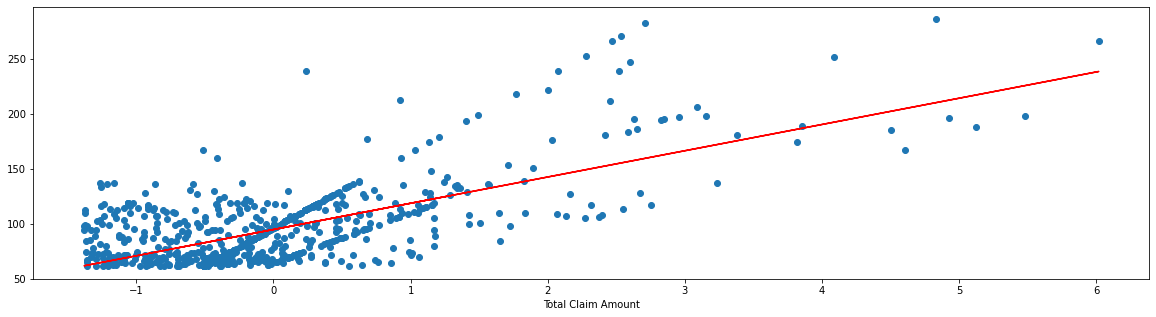

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,9].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Total Claim Amount')

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# KNN

In [50]:
param_gridknn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]}

In [51]:
grid_searchknn = GridSearchCV(KNeighborsRegressor(), param_gridknn, cv=5, return_train_score=True)

In [52]:
grid_searchknn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17]},
             return_train_score=True)

In [53]:
print("Best parameters: {}".format(grid_searchknn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchknn.best_score_))

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.5284


In [54]:
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_train, y_train)
print(knn_reg.score(X_train, y_train))
print(knn_reg.score(X_test, y_test))

0.7026014223217159
0.5335265315299768


Text(0.5, 0, 'Total Claim Amount')

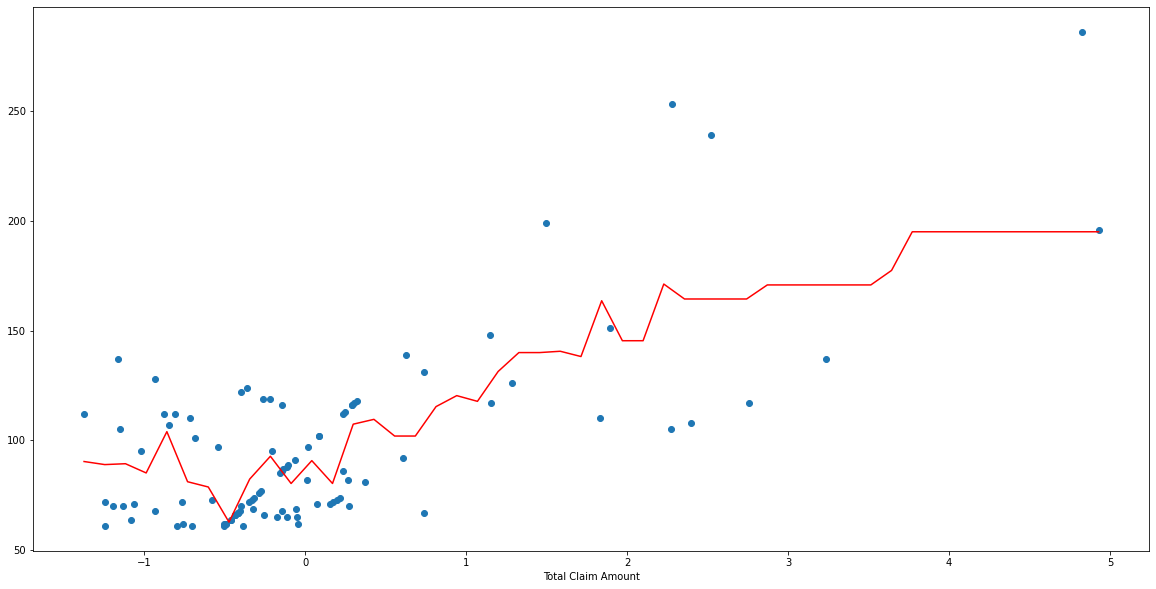

In [107]:
X_b = X_train[:100,9].reshape(-1,1)
y_b = y_train[:100]

knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.subplots(figsize = (20,10))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('Total Claim Amount')

# Lasso

In [56]:
from sklearn.linear_model import Lasso


In [57]:
param_gridlass = {'alpha':[.001, .01, .1, 1, 10, 100, 1000]}

In [58]:
grid_searchlass = GridSearchCV(Lasso(random_state = 0), param_gridlass, cv=5, return_train_score=True)

In [59]:
grid_searchlass.fit(X_train, y_train)

C:\Users\Mohammed Rahman\Documents\utda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.966e+03, tolerance: 7.440e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mohammed Rahman\Documents\utda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.021e+03, tolerance: 7.426e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mohammed Rahman\Documents\utda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [60]:
print("Best parameters: {}".format(grid_searchlass.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchlass.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.8554


In [61]:
lasso = Lasso(0.1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test, y_test))

0.8650184410767081
0.8224201615619651


In [62]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

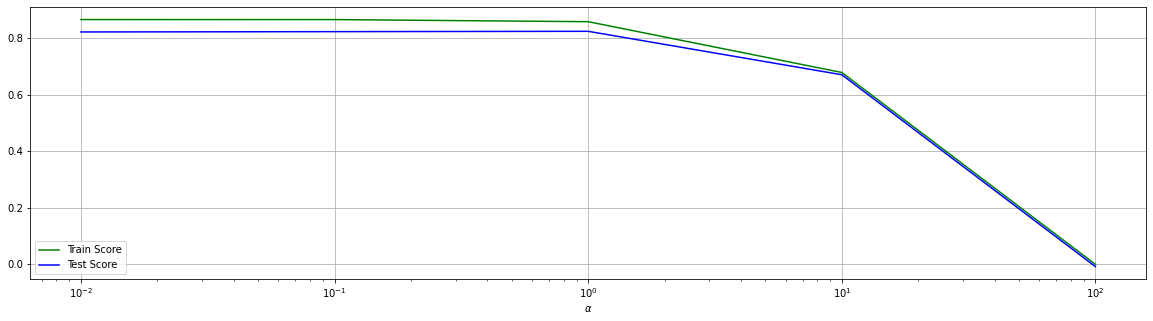

In [63]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

C:\Users\Mohammed Rahman\Documents\utda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.538e+03, tolerance: 9.669e+01
  model = cd_fast.enet_coordinate_descent(


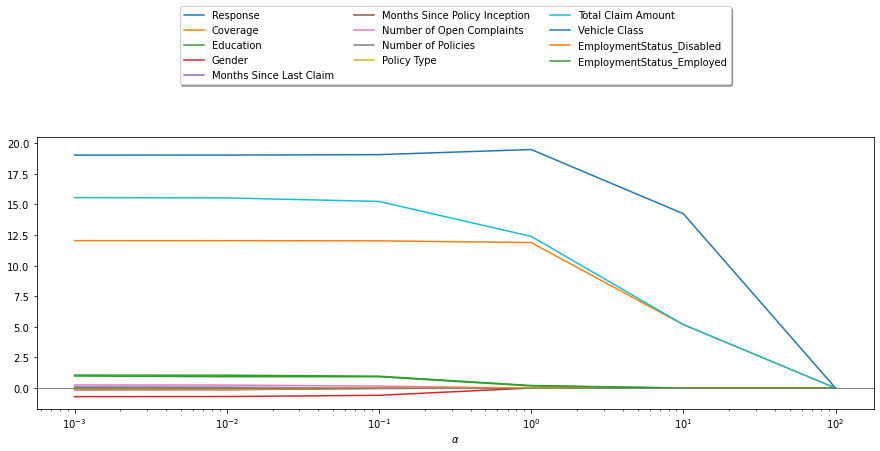

In [64]:
# %matplotlib inline


x_range = [0.001, 0.01, 0.1, 1, 10, 100]
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Ridge

In [100]:
from sklearn.linear_model import Ridge

train_score_list = []
test_score_list = []

for alpha in [.001, .01, .1, 1, 10, 100, 1000]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,  y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

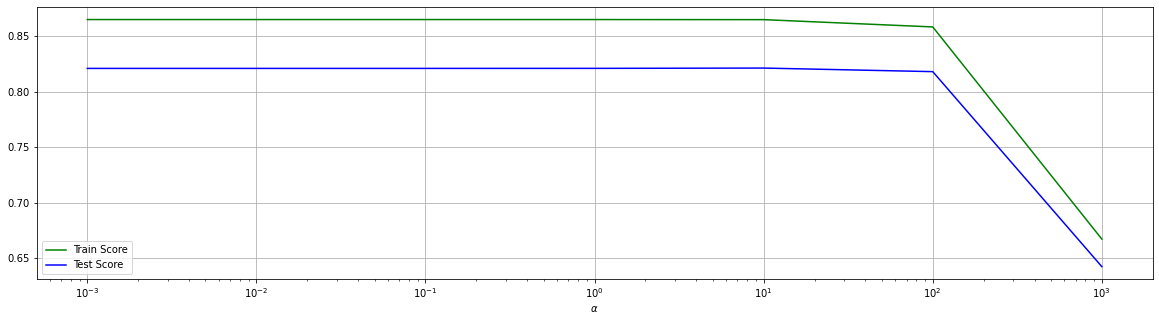

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [.001, .01, .1, 1, 10, 100, 1000]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [102]:
param_gridrid = {'alpha':[.001, .01, .1, 1, 10, 100, 1000]}

In [103]:
grid_searchrid = GridSearchCV(Ridge(random_state = 0), param_gridrid, cv=5, return_train_score=True)

In [104]:
grid_searchrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [105]:
print("Best parameters: {}".format(grid_searchrid.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchrid.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.8544


In [70]:
ridge = Ridge(10)
ridge.fit(X_train,  y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8650645503040223
0.8214291822775358


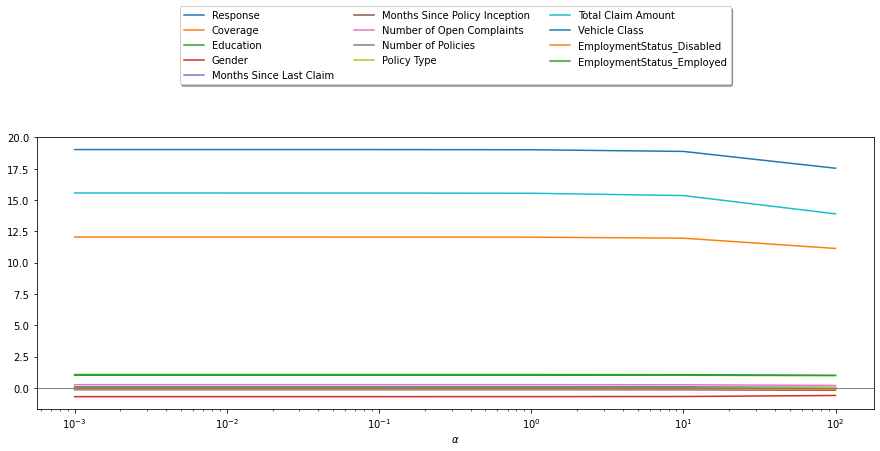

In [71]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# SVR

In [72]:
from sklearn.svm import SVR

In [73]:
param_gridsvr = {'C':[0.01, 0.1, 1, 10, 100],'epsilon': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}

In [74]:
grid_searchsvr = GridSearchCV(SVR(kernel='rbf'), param_gridsvr, cv=5, return_train_score=True)

In [75]:
grid_searchsvr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [76]:
print("Best parameters: {}".format(grid_searchsvr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchsvr.best_score_))

Best parameters: {'C': 100, 'epsilon': 10, 'gamma': 0.01}
Best cross-validation score: 0.8648


In [77]:
regressork = SVR(kernel='rbf', C = 100, epsilon = 10, gamma = 0.01)
regressork.fit(X_train,y_train)
print('train: ', regressork.score(X_train, y_train))
print('test: ', regressork.score(X_test, y_test))

train:  0.9014805914399209
test:  0.8280051465894889


Text(0.5, 0, 'Total Claim Amount')

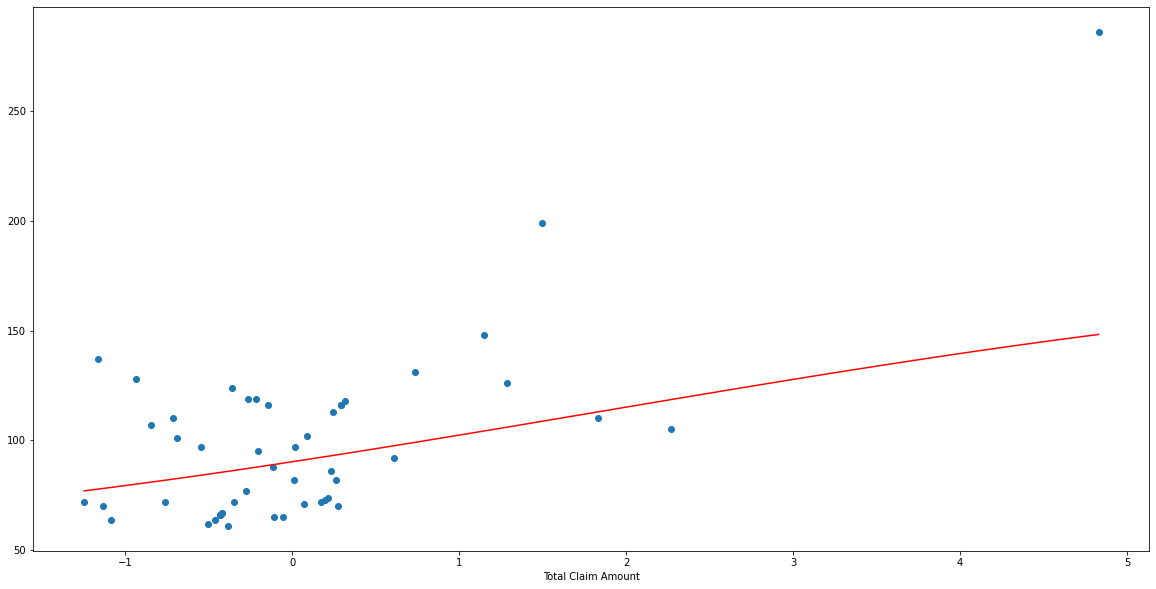

In [78]:
X_b = X_train[:50,9].reshape(-1,1)
y_b = y_train[:50]

regressork = SVR(kernel='rbf', C = 100, epsilon = 10, gamma = 0.01)
regressork.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressork.predict(X_new)

plt.subplots(figsize = (20,10))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('Total Claim Amount')

In [79]:
grid_searchsvrl = GridSearchCV(SVR(kernel='linear'), param_gridsvr, cv=5, return_train_score=True)

In [80]:
grid_searchsvrl.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [81]:
print("Best parameters: {}".format(grid_searchsvrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchsvrl.best_score_))

Best parameters: {'C': 10, 'epsilon': 10, 'gamma': 0.01}
Best cross-validation score: 0.8533


In [82]:
regressorl = SVR(kernel='linear', C = 10, epsilon = 10, gamma = 0.01)
regressorl.fit(X_train,y_train)
print('train: ', regressorl.score(X_train, y_train))
print('test: ', regressorl.score(X_test, y_test))

train:  0.8584936457256727
test:  0.8232357121471714


Text(0.5, 0, 'Total Claim Amount')

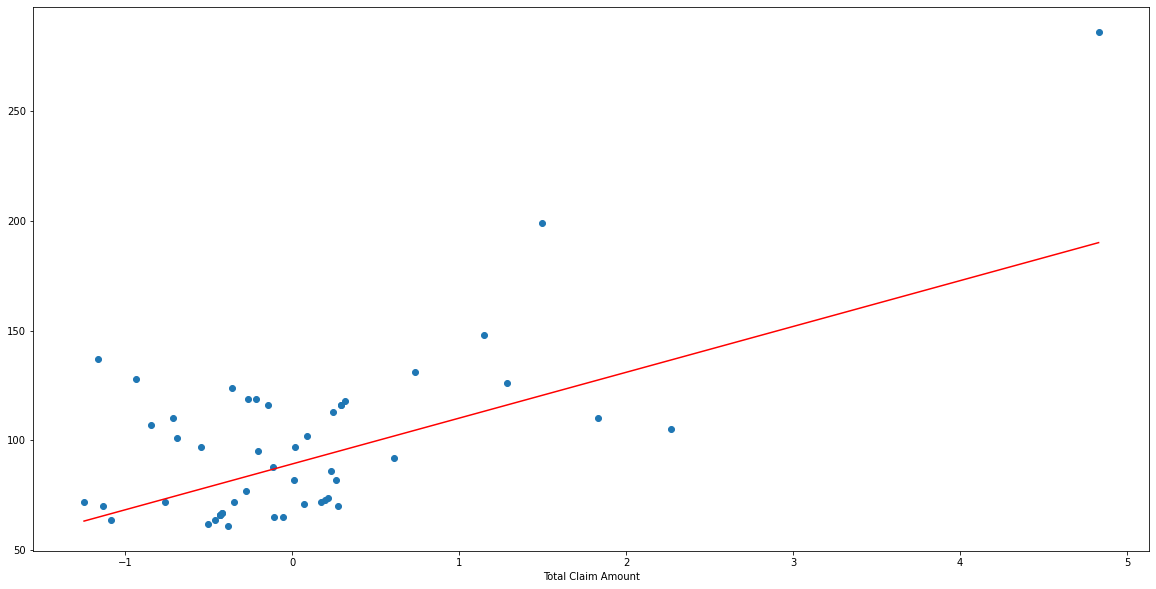

In [83]:
X_b = X_train[:50,9].reshape(-1,1)
y_b = y_train[:50]

regressorl.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressorl.predict(X_new)

plt.subplots(figsize = (20,10))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('Total Claim Amount')

In [84]:
grid_searchsvrp = GridSearchCV(SVR(kernel='poly'), param_gridsvr, cv=5, return_train_score=True)

In [85]:
grid_searchsvrp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [86]:
print("Best parameters: {}".format(grid_searchsvrp.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchsvrp.best_score_))

Best parameters: {'C': 10, 'epsilon': 10, 'gamma': 0.1}
Best cross-validation score: 0.8064


In [87]:
regressorp = SVR(kernel='poly', C = 10, epsilon = 10, gamma = 0.1)
regressorp.fit(X_train,y_train)
print('train: ', regressorp.score(X_train, y_train))
print('test: ', regressorp.score(X_test, y_test))

train:  0.947114766736788
test:  0.7965776676543337


Text(0.5, 0, 'Total Claim Amount')

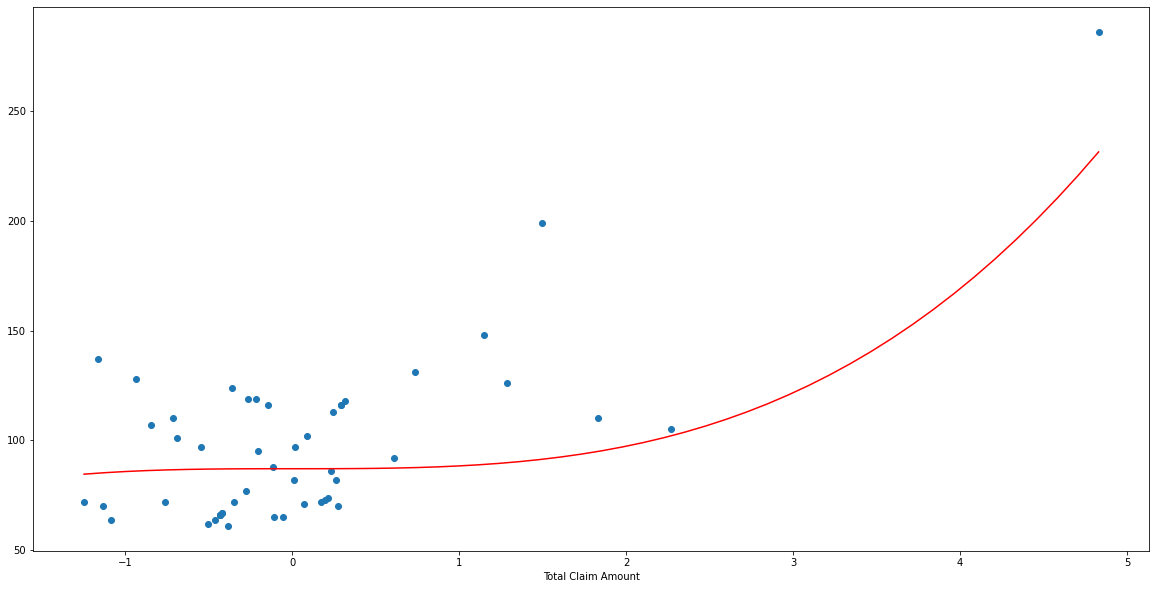

In [88]:
X_b = X_train[:50,9].reshape(-1,1)
y_b = y_train[:50]

regressorp.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressorp.predict(X_new)

plt.subplots(figsize = (20,10))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('Total Claim Amount')

# Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
param_griddtr = {'max_depth':[2,5,10,25,50],'max_leaf_nodes': [2,5,10,25,50]}

In [91]:
grid_searchdtr = GridSearchCV(DecisionTreeRegressor(random_state = 0), param_griddtr, cv=5, return_train_score=True)

In [92]:
grid_searchdtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 5, 10, 25, 50],
                         'max_leaf_nodes': [2, 5, 10, 25, 50]},
             return_train_score=True)

In [93]:
print("Best parameters: {}".format(grid_searchdtr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchdtr.best_score_))

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 10}
Best cross-validation score: 0.9561


In [94]:
regressor = DecisionTreeRegressor(max_depth = 5 , random_state=0, max_leaf_nodes = 10)
regressor.fit(X_train,y_train)
print('train: ', regressor.score(X_train, y_train))
print('test: ', regressor.score(X_test, y_test))

train:  0.967188068930121
test:  0.9442882698036694


Text(0.5, 0, 'Total Claim Amount')

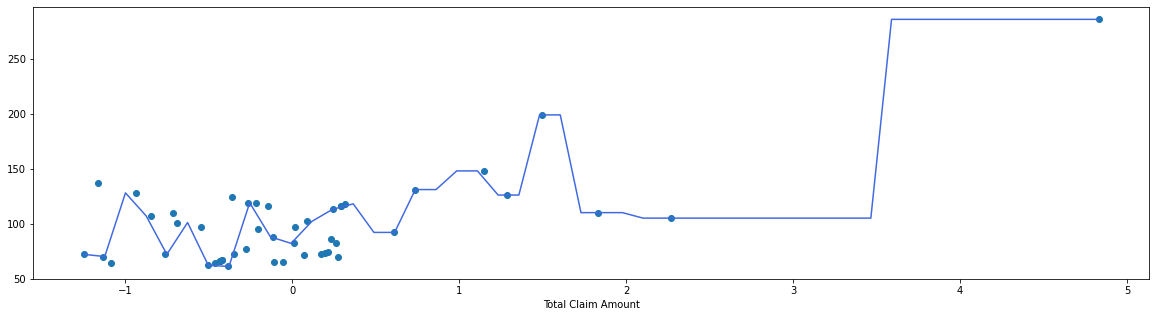

In [95]:


X_b = X_train[:50,9].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor()
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)
plt.xlabel('Total Claim Amount')

# Polynomial

In [96]:
from  sklearn.preprocessing  import PolynomialFeatures

In [210]:
ptrain_score_array = []
ptest_score_array = []
for k in range(1,6):
    poly = PolynomialFeatures(degree = k)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    ptrain_score_array.append(poly_reg.score(X_train_poly, y_train))
    ptest_score_array.append(poly_reg.score(X_test_poly, y_test))

print(ptrain_score_array)
print(ptest_score_array)

[0.8651449746133686, 0.9549341248700001, 1.0, 1.0, 1.0]
[0.8211230462077029, 0.8317312318783026, -0.18453291687100215, 0.6122642049155969, 0.42887757564439555]


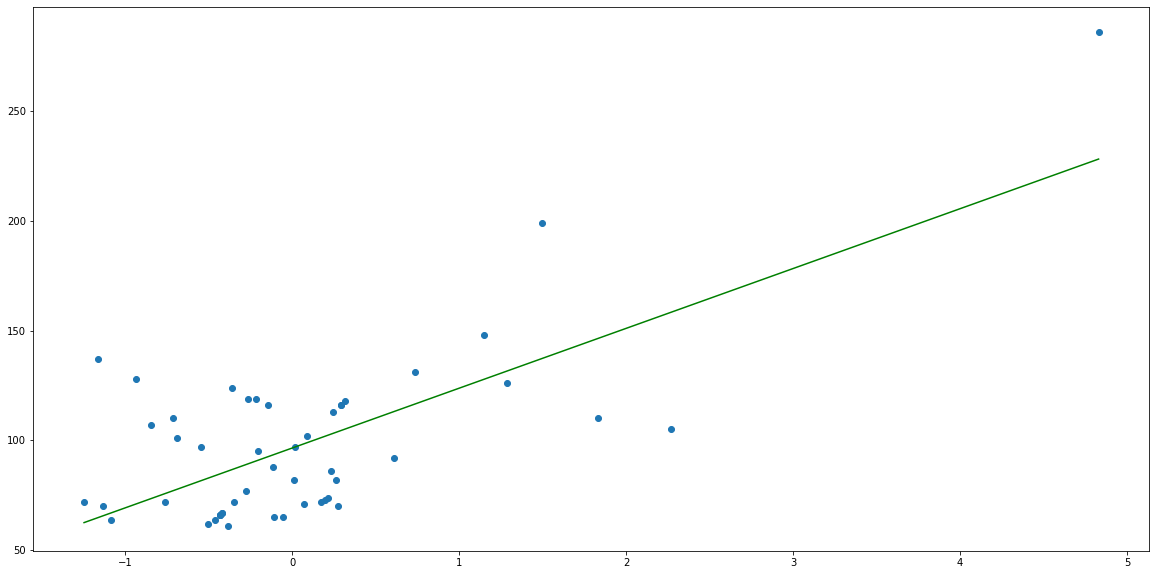

In [215]:
X_b = X_train[:50,9].reshape(-1,1)
y_b = y_train[:50]
poly = PolynomialFeatures(degree = 1)
X_train_poly = poly.fit_transform(X_b)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_b)
plt.subplots(figsize = (20,10))
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
plt.scatter(X_b, y_b)
plt.plot(X_new , poly_reg.predict(poly.transform(X_new)), c = 'g', label = 'Polynomial regression')
plt.show()